# Design Tolerances, Sensitivity Analysis
### Chapter 2.11 - *DC Analysis*

A MIMO circuit of Fig. 2.7.3 is uniquely characterized by its $L$ constants (primary
parameters) $P_1,\dots,P_L$.  Any transfer function $K_{ij}$ (secondary parameter) is a function of these
constants,$K_{ij}=K_{ij}(P_1,\dots,P_L)$, and any output signal $Y_j$ is a function of these constants and input
signals, $Y_j=Y_j(X_1,\dots,X_M,P_1,\dots,P_L)$ .  Both transfer functions and output signals can be
considered as circuit variables designated by circuit constants and/or circuit inputs:

\begin{equation}\tag{1}
    F_k=F_k(X_1,\dots,X_P);\quad X_{M+l}=P_l \quad \text{where}\;l=1,\dots,L\quad\text{and}\quad P=M+L
\end{equation}    

### Example 2.11.1
A voltage divider presented in Fig. 2.11.1 is characterized by two parameters, resistances
$R_1$ and $R_2$. Then, two circuit variables, transfer functions are selected:  

* input resistance:  

\begin{equation}\tag{2a}
    F_1=R_{in} = \frac{U_{in}}{I} = R_1+R_2
\end{equation}    

**The proof:**  

Via KVL an Ohm's Law,  

\begin{equation}\tag{Ex1.1}
    U_{in} = R_1I + R_2I_1
\end{equation}    

and,
\begin{equation}\tag{Ex1.2}
    U_{in} = R_1I + U_{out}
\end{equation}    

Via KCL,  

\begin{equation}\tag{Ex1.3}
    I = I_1 + I_2
\end{equation}    

Assuming open-circuit conditions across the two right hand terminals of the voltage divider (i.e. $I_2=0$), via equations (Ex1.3) and (Ex1.1) and substitution,  

$$ U_{in} = I(R_1+R_2)$$

Thus, equation (2a).  Q.E.D.

![Fig-2.11.1](Figures/Fig-2.11.1.png)

* gain:  

\begin{equation}\tag{2b}
    F_2 = K = \frac{U_{out}}{U_{in}} = \frac{R_2}{R_1+R_2}
\end{equation}    

**The proof:**  

Assuming $I_2=0$, via equations (Ex1.1), (Ex1.2), and (Ex1.3) in conjunction with equivalance principle,  

\begin{equation}\tag{Ex1.4}
    U_{out} = R_2I
\end{equation}    

And via equations (Ex1.4) and (2a), equation (2b).  Q.E.D.

Then, ideal and practical circuits are distinguished.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ideal Circuit

All circuit parameters have **nominal values**.  

\begin{equation}\tag{3}
    X_i = X_i^n;\quad i=1,\dots,P
\end{equation}    

### Practical Circuit
All circuit parameters are characterized by nominal values and design
tolerances, i.e. their values lay within **tolerance margins**.

\begin{equation}\tag{4}
    X_i^- < X_i < X_i^+;\quad i=1,\dots,P
\end{equation}    

Based on tests, made during the manufacturing process, the probability distribution for each
parameter can be found. Presented in Fig. 2.11.2 **normal** or Gauss **distribution** is the most
commonly used. This distribution is described by the following equation (index $i$ has been
omitted for simplicity of description):
where $\sigma$ is the so called **standard deviation**.  

\begin{equation}\tag{5}
    p(X) = \frac{1}{\sigma \sqrt{2\pi}}\,e^h\quad\text{where}\quad h = -\frac{(X-X^n)^2}{2\sigma^2}
\end{equation}    

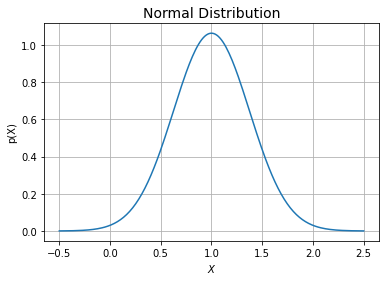

In [7]:
# Define the parameter deviation and nominal value, denoted as 'DX' and 'Xn' respectively.
DX = 0.25
Xn = 1

"""Via equation (7) and the definition of 'DX', an acceptable standard deviation, denoted as 'sigma', is"""
s=sigma = DX*3/2

# Create the domain of p(X), which gives the distribution.
X = np.linspace(-0.5, 2.5, num=200)

# Define the function that gives the distribution (p(X)).
h = -((X-Xn)**2)/(2*s**2)
p = (np.e**h)/(s*np.sqrt(2*np.pi))

# Create the figure ('fig') and axes ('ax') objects
fig, ax = plt.subplots()
ax.set_title('Normal Distribution', size=14)
ax.set_xlabel(r'$X$')
ax.set_ylabel(r'p(X)')
ax.grid()

# Plot the distribution
ax.plot(X, p)

For the given standard deviation, tolerance margins are related to the probability
distribution by the following equation:  

\begin{equation}\tag{6}
    q = \int_{X^- + \Delta X}^{X^+ - \Delta X}p(X)\,\mathrm{d}X = \int_{X^n-\Delta X}^{X^n+\Delta X}p(X)\,\mathrm{d}X
\end{equation}    

where $q$ is the production yield, e.g. if $q=0.95$ then $95\mathrm{\%}$ of the production is classified as
“healthy”.

For the assumed parameter deviation $\Delta X$, $X^+-X^n = X^n-X^- = \Delta X > 0$  , the production yield $q$
can be calculated from (2.11.6). If $q$ is assumed, then the acceptable deviation can be
calculated, practically deviation of  

\begin{equation}\tag{7}
    \Delta X = (2\div 3)\sigma
\end{equation}

is accepted.

An element is normally characterized by its parameter deviation to nominal value ratio, so
called **parameter tolerance**:  

\begin{equation}\tag{8}
    \mathrm{tol}_x = \frac{\Delta X}{X^n}
\end{equation}    

For $P$ parameters characterizing a circuit, its tolerance region can be defined.

### Tolerance Region

A tolerance region (tolerance box) is a parallelepiped in the parameter space $\mathfrak{R}^{\small P}$ with planes
parallel with coordinate axes, and designated by tolerance margins of circuit parameters $X_1,\dots,X_P$.

### Example 2.11.1 – cont.
The nominal values of resistances and their tolerances are: $R_1^n, R_2^n = 1\Omega$ ,$\mathrm{tol}_1 = 0.1$, and $\mathrm{tol}_2 = 0.05$. Graph the tolerance region.

Via equation (8) and the presuppositions of this example,  

\begin{equation}\tag{Ex1.5a}
    \Delta R_1 = 0.1\cdot 1\Omega = 0.1\Omega
\end{equation}    

and,
\begin{equation}\tag{Ex1.5b}
    \Delta R_2 = 0.05\cdot 1\Omega = 0.05\Omega
\end{equation}    

The tolerance margins of $R_1$ and $R_2$ are thus,  

$$ 0.9\Omega < R_1 < 1.1\Omega$$

and,
$$ 0.95\Omega < R_2 < 1.05\Omega$$

And, the tolerance region is given by the Cartesian product of the aforementioned tolerance margins.

Presence of design tolerances has to be taken into account at a circuit design stage. Two
approaches are possible:
1. Parameter design tolerances are given by the design-engineer. Finding of maximum
    deviations of circuit variables, caused by these tolerances, is the task.
2. Design specifications, acceptable deviations of circuit variables, are given by the
    design-engineer. Finding of parameter design tolerances is the task.

## Maximum Design Deviation of Circuit Variable

**Designation of the maximum design deviation of circuit variable:**  

For each circuit variable $F$ (index has been omitted for simplicity of description), its
maximum deviations, due to design tolerances of circuit parameters, can be found. Two
different techniques are possible:

* *worse case* analysis
* sensitivity analysis

### *Worst case* analysis
It is assumed that within the tolerance region, first derivatives of a circuit variable function
(2.11.1) do not change sign:

\begin{equation}\tag{9}
    \mathrm{sgn}\left(\frac{\partial F}{\partial X_i}\right) = \mathrm{const}\quad\text{for}\;X_i\in<X_i^-,X_i^+>;\;i=1,\dots,P
\end{equation}

Note that the above version of equation (9) is from the textbook.  However, to stay true to the annotation of said equation, a different version is, *i think*, needed.  

\begin{equation}\tag{9}
    \forall i \in \mathbb{N}:i\le P\quad \mathrm{sgn}\left(\frac{\partial F}{\partial X_i}\right) = \mathrm{const} \quad \text{where}\; X_j^- < X_j < X_j^+\quad \forall j\in\mathbb{N}:j\le P
\end{equation}    

Then, the boundary values of a circuit variable, due to a presence of parameter design
tolerances, are calculated by setting in function (2.11.1) the boundary values of parameters:  

\begin{equation}\tag{10a}
    F^+ = F(X_1^*,\dots,X_P^*)
\end{equation}    

where,  

$$X_i^* = \begin{cases}\tag{10a}
X_i^+ \quad \text{if }(\partial F/\partial X_i)^n>0 \\
X_i^- \quad \text{otherwise}
\end{cases} $$

\begin{equation}\tag{10b}
    F^- = F(X_1^*,\dots,X_P^*)
\end{equation}    

where,
$$ X_i^* = \begin{cases}\tag{10b}
X_i^+ \quad \text{if }(\partial F/\partial X_i)^n < 0\\
X_i^- \quad \text{otherwise} \end{cases}$$

and,
\begin{equation}\tag{11}
    (\partial F/\partial X_i)^n = S_{X_i}^F
\end{equation}    

Here, $S_{X_i}^F$ is the 1st derivative calculated at the nominal point $\mathbf{X}^n$ , the so called **sensitivity** of a circuit variable $F$ with respect to small changes of parameter $X_i$ in a close neighborhood of the nominal point, the 1st order sensitivity. For $M$ circuit variables and $P$ circuit parameters, the $M\times P$ sensitivity matrix can be created.  

$$\mathbf{S} = \begin{bmatrix}\tag{11a}
S_{X_1}^{F_1} &\dots &S_{X_P}^{F_1} \\
\vdots &\ddots &\vdots \\
S_{X_1}^{F_M} &\dots &S_{X_P}^{F_M}
\end{bmatrix}$$

Finally, the maximum deviation caused by parameter tolerances, denoted as '$\Delta F_\max$', is given by:  

\begin{equation}\tag{12}
    \Delta F_\max = |F^+ - F^n| \approxeq |F^- - F^n|
\end{equation}    

### *Example 2.11.1* – cont.
The boundary values of circuit variables are calculated from the following equations:  

For the input resistance ($R_{in}$):  

\begin{equation}\tag{Ex1.6a}
    R_{in}^+ = R_{in}(R_1^+, R_2^+) = R_1^n + \Delta R_1 + R_2^n + \Delta R_2 = 2.15\Omega
\end{equation}    

\begin{equation}\tag{Ex1.6b}
    R_{in}^- = R_{in}(R_1^-, R_2^-) = 2\Omega - \Delta R_1 - \Delta R_2 = 1.85\Omega
\end{equation}    

For the top boundary of the gain ($K^+$):  

$$\frac{\partial K}{\partial R_2} =\frac{1}{R_1+R_2} -\frac{R_2}{(R_1 + R_2)^2} $$

$$ \frac{\partial K}{\partial R_2}(R_1^n,R_2^n) = \frac{\partial K}{\partial R_2}(1\Omega,1\Omega) = \left(\frac{1}{2}-\frac{1}{4}\right)\,\mathrm{S} > 0$$

Thus,  

\begin{equation}\tag{Ex1.7a}
    R_2^* = R_2^+
\end{equation}    

And,
$$ \frac{\partial K}{\partial R_1} = -\frac{R_2}{(R_1+R_2)^2}$$

$$ \frac{\partial K}{\partial R_1}(R_1^n,R_1^n) = -0.25\mathrm{S} < 0$$  

Thus,
\begin{equation}\tag{Ex1.7b}
    R_1^* = R_1^-
\end{equation}    

Finally,
\begin{equation}\tag{Ex1.7}
    K^+ = K(R_1^-, R_2^+) = K(0.9\Omega, 1.05\Omega) = \frac{1.05\Omega}{0.9\Omega + 1.05\Omega} \approxeq 0.538 \frac{\mathrm{V}}{\mathrm{V}} 
\end{equation}    

In [8]:
1.05/(0.9+1.05)

0.5384615384615384

For the bottom boundary of the gain ($K^-$):  

\begin{equation}\tag{Ex1.8}
    K^- = K(R_1^+, R_2^-) = \frac{0.9\Omega}{1.95\Omega} \approxeq 0.462 \frac{\mathrm{V}}{\mathrm{V}}
\end{equation}    

In [9]:
0.9/1.95

0.46153846153846156

The nominal values are, of course:  

$$ R_{in}^n = 2\Omega$$

and,
$$ K^n = 0.5\frac{\mathrm{V}}{\mathrm{V}}$$

and the maximum deviations, caused by the design deviations of parameters are:  

$$ \max \Delta R_{in} = 0.15\Omega \quad \text{and} \quad \Delta K_\max \approxeq |0.5 - 0.538|\frac{\mathrm{V}}{\mathrm{V}} = 0.038\frac{\mathrm{V}}{\mathrm{V}}$$



### Sensitivity Analysis
Consider the 1st order approximation of the circuit variable function (2.11.1), its Taylor’s
series expansion around the nominal point:  

\begin{equation}\tag{13}
    F(\mathbf{X}^n + \mathbf{\Delta X}) \approxeq F(\mathbf{X}^n) + \sum_{i=1}^P (\partial F/\partial X_i)^n\Delta X_i
\end{equation}    

Then, the deviation of a circuit variable can be expressed by the 1st order sensitivities and
parameter deviations:  

\begin{equation}\tag{14}
    \Delta F = F(\mathbf{X}^n + \mathbf{\Delta X}) - F(\mathbf{X}^n) \approxeq \sum_{i=1}^P S_{X_i}^F \Delta X_i
\end{equation}    

The **relative sensitivity** can be introduced: